In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/ovi thesis/data/data.csv')
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,One Final Law
0,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,Yes,Yes,13
1,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,10
2,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,No,No,Yes,1
3,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,Yes,No,Yes,13
4,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,13


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = data.copy()
encoder = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = encoder.fit_transform(df_encoded[col])

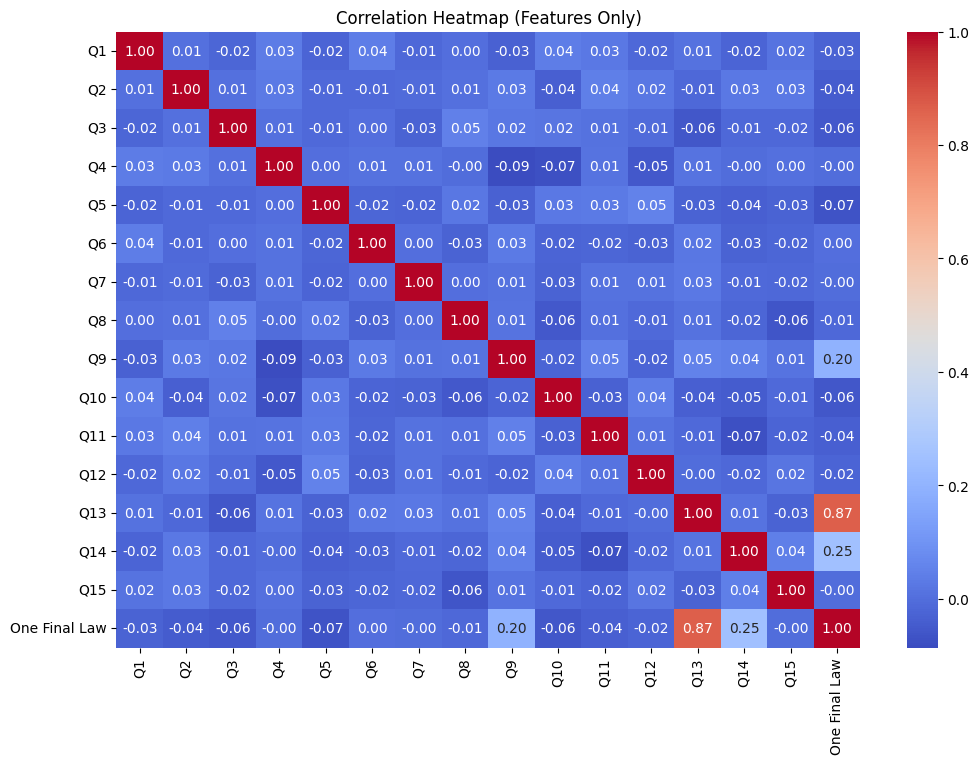

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_encoded.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap (Features Only)")
plt.show()

/tmp/ipython-input-4032605043.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=law_counts.index, y=law_counts.values, palette="viridis")


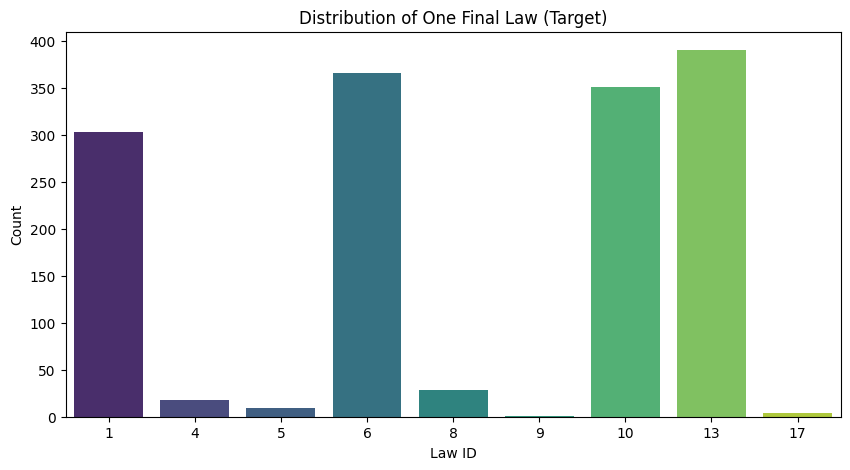

In [ ]:
law_counts = df_encoded["One Final Law"].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=law_counts.index, y=law_counts.values, palette="viridis")
plt.title("Distribution of One Final Law (Target)")
plt.xlabel("Law ID")
plt.ylabel("Count")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=["One Final Law"])
y = df_encoded["One Final Law"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score, learning_curve
import matplotlib.pyplot as plt
import numpy as np

def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    report_dict = classification_report(y_test, y_pred_test, output_dict=True, zero_division=0)

    return train_acc, test_acc, report_dict

def cross_validation(model, X_train, y_train, cv=5):
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv)
    print(f"{cv}-Fold CV Accuracy (train):", np.mean(cv_scores))
    return cv_scores

def check_overfitting(train_acc, test_acc, threshold=0.1):
    if train_acc - test_acc > threshold:
        print(f"Warning: Possible overfitting detected! (Train-Test diff: {train_acc - test_acc:.2f})")
    else:
        print("No significant overfitting detected.")

def plot_learning_curve(model, model_name, X_train, y_train, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(5,3))
    plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="green", label="Cross-validation score")
    plt.title(f"{model_name} Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()



=== Naive Bayes ===
5-Fold CV Accuracy (train): 0.895409304002885
No significant overfitting detected.


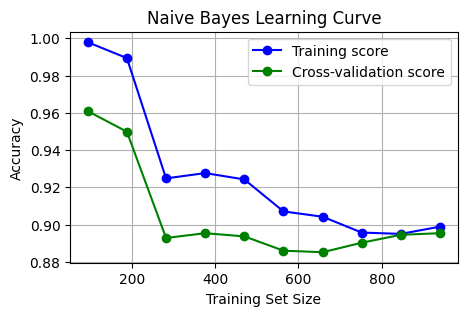


=== KNN ===
5-Fold CV Accuracy (train): 0.8793003966822935
No significant overfitting detected.


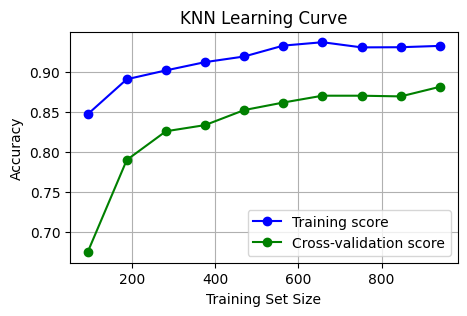


=== SVM ===
5-Fold CV Accuracy (train): 0.9829895420122611
No significant overfitting detected.


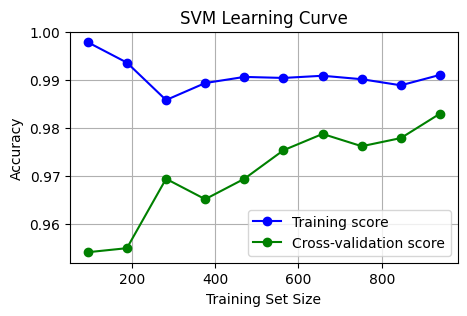


=== LDA ===
5-Fold CV Accuracy (train): 0.4804147133068879
No significant overfitting detected.


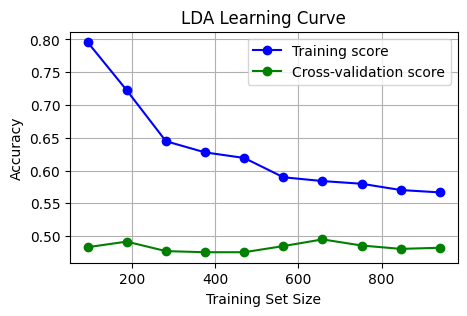


=== Linear Regression ===
5-Fold CV Accuracy (train): 0.9710962856112513
No significant overfitting detected.


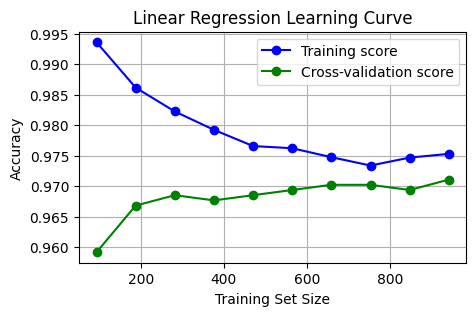


=== Logistic Regression ===
5-Fold CV Accuracy (train): 0.9710962856112513
No significant overfitting detected.


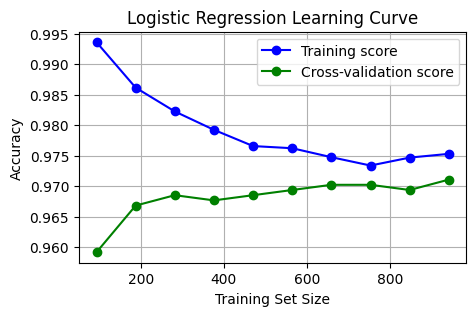


=== Decision Stump ===
5-Fold CV Accuracy (train): 0.5153083303281644
No significant overfitting detected.


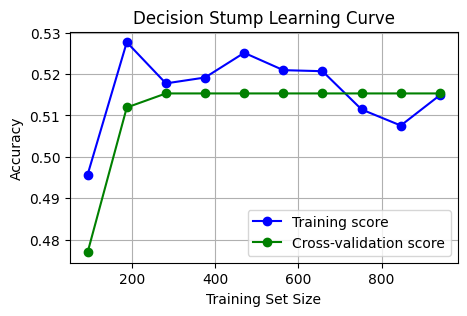


=== Decision Tree ===
5-Fold CV Accuracy (train): 0.9744897223223946
No significant overfitting detected.


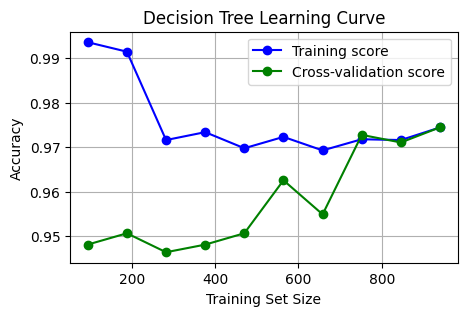

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', probability=True),
    "LDA": LinearDiscriminantAnalysis(),
    "Linear Regression": LogisticRegression(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Stump": DecisionTreeClassifier(max_depth=1),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
}

all_reports = []
for name, model in models.items():
    print(f"\n=== {name} ===")
    model = train_model(model, X_train, y_train)
    train_acc, test_acc, report_dict = evaluate_model(model, X_train, y_train, X_test, y_test)
    cross_validation(model, X_train, y_train)
    check_overfitting(train_acc, test_acc)
    plot_learning_curve(model, name, X_train, y_train)  # optional

    report_df = pd.DataFrame(report_dict).transpose()
    report_df['model'] = name

    all_reports.append(report_df)

In [ ]:
final_report_df = pd.concat(all_reports).reset_index().rename(columns={'index': 'class'})
print(final_report_df)

           class  precision    recall  f1-score     support          model
0              1   0.968750  0.516667  0.673913   60.000000    Naive Bayes
1              4   0.777778  1.000000  0.875000    7.000000    Naive Bayes
2              5   0.600000  0.750000  0.666667    4.000000    Naive Bayes
3              6   1.000000  1.000000  1.000000   67.000000    Naive Bayes
4              8   0.093750  0.500000  0.157895    6.000000    Naive Bayes
..           ...        ...       ...       ...         ...            ...
91            13   1.000000  1.000000  1.000000   83.000000  Decision Tree
92            17   0.000000  0.000000  0.000000    1.000000  Decision Tree
93      accuracy   0.959184  0.959184  0.959184    0.959184  Decision Tree
94     macro avg   0.489352  0.555556  0.511567  294.000000  Decision Tree
95  weighted avg   0.933730  0.959184  0.943942  294.000000  Decision Tree

[96 rows x 6 columns]


In [ ]:
# final_report_df.to_csv('/content/drive/MyDrive/ovi thesis/data/final_report.csv')

In [ ]:
final_report_df[final_report_df['model'] == "SVM"]

,class,precision,recall,f1-score,support,model
24,1,0.966102,0.950000,0.957983,60.00000,SVM
25,4,0.875000,1.000000,0.933333,7.00000,SVM
26,5,0.800000,1.000000,0.888889,4.00000,SVM
27,6,1.000000,1.000000,1.000000,67.00000,SVM
28,8,0.571429,0.666667,0.615385,6.00000,SVM
29,9,0.000000,0.000000,0.000000,1.00000,SVM
30,10,1.000000,1.000000,1.000000,65.00000,SVM
31,13,1.000000,1.000000,1.000000,83.00000,SVM
32,17,0.000000,0.000000,0.000000,1.00000,SVM
33,accuracy,0.976190,0.976190,0.976190,0.97619,SVM


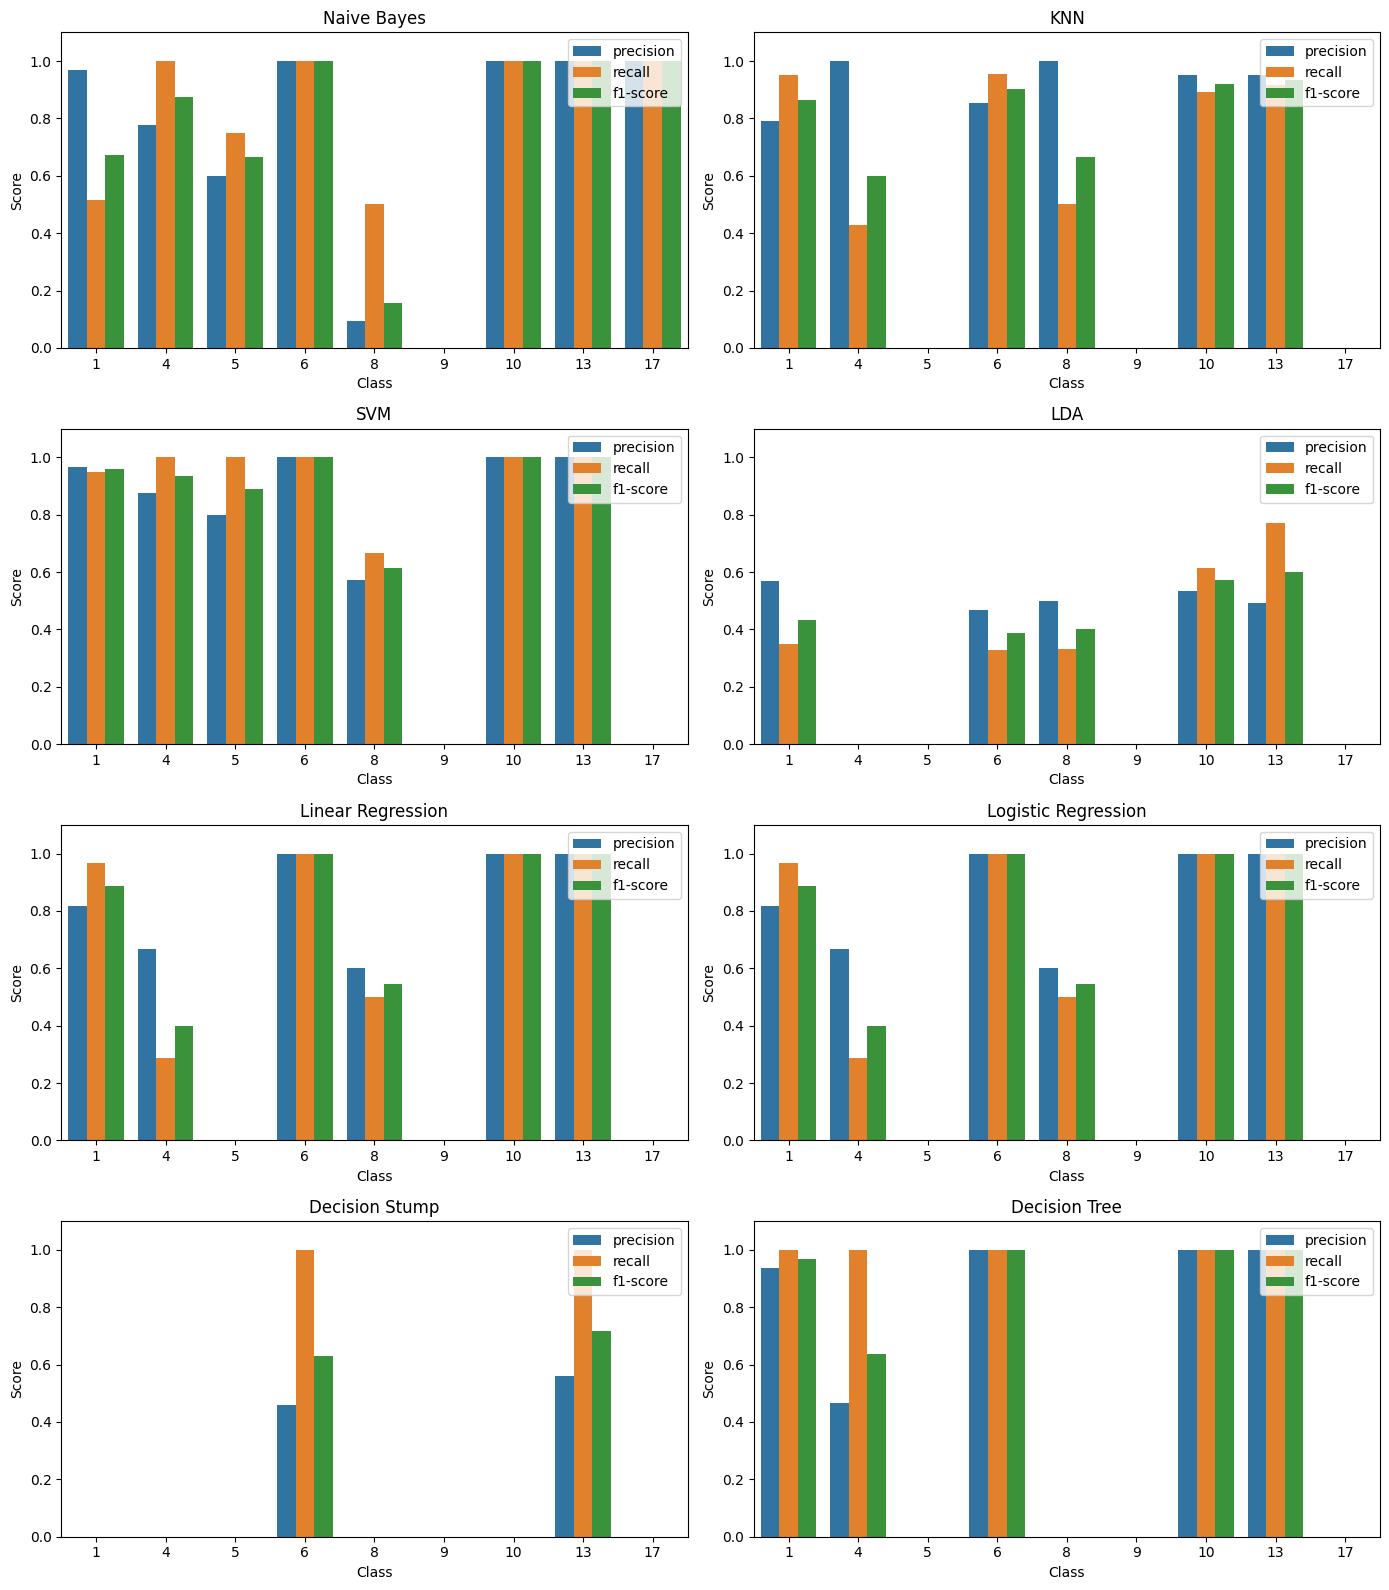

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_plot = final_report_df[~final_report_df['class'].isin(['accuracy', 'macro avg', 'weighted avg'])]
models = df_plot['model'].unique()
n_models = len(models)
n_cols = 2
n_rows = (n_models + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows*4))
axes = axes.flatten()

for i, model in enumerate(models):
    ax = axes[i]
    data = df_plot[df_plot['model'] == model]

    data_melted = data.melt(id_vars='class', value_vars=['precision','recall','f1-score'], var_name='Metric', value_name='Score')
    sns.barplot(x='class', y='Score', hue='Metric', data=data_melted, ax=ax)
    ax.set_title(model)
    ax.set_ylim(0, 1.1)
    ax.set_xlabel("Class")
    ax.set_ylabel("Score")
    ax.legend(loc='upper right')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


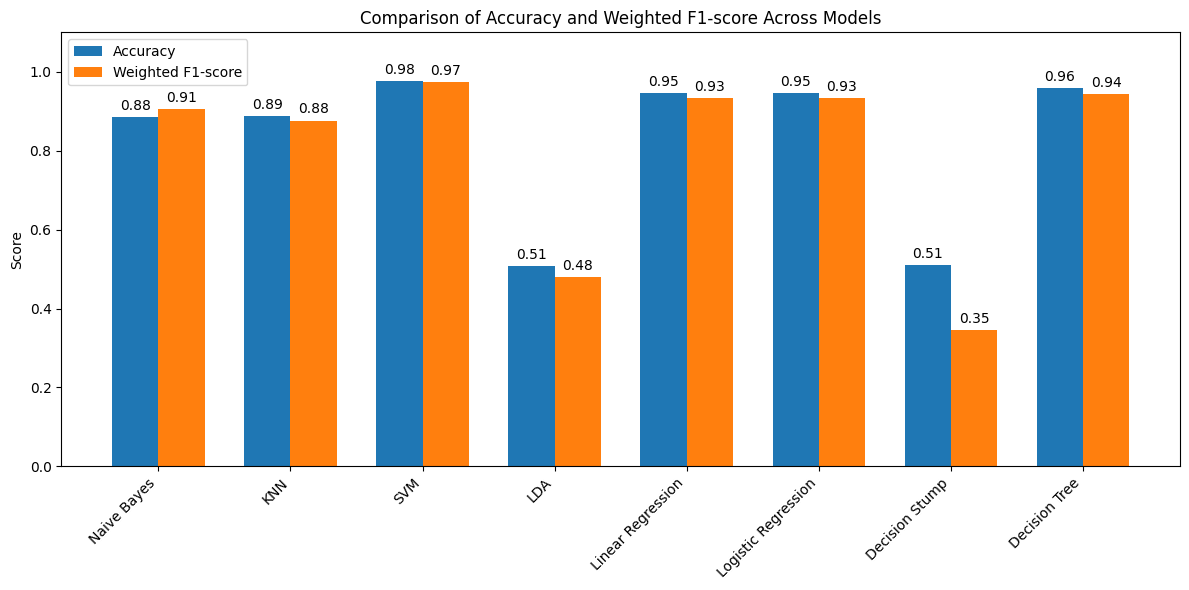

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

summary_df = final_report_df[final_report_df['class'].isin(['accuracy', 'weighted avg'])]
comparison_list = []

for model in summary_df['model'].unique():
    df_model = summary_df[summary_df['model'] == model]
    acc = df_model[df_model['class'] == 'accuracy']['f1-score'].values[0]
    f1 = df_model[df_model['class'] == 'weighted avg']['f1-score'].values[0]
    comparison_list.append({'model': model, 'accuracy': acc, 'weighted_f1': f1})

comparison_df = pd.DataFrame(comparison_list)

x = np.arange(len(comparison_df['model']))
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))
bars1 = ax.bar(x - width/2, comparison_df['accuracy'], width, label='Accuracy')
bars2 = ax.bar(x + width/2, comparison_df['weighted_f1'], width, label='Weighted F1-score')

ax.set_xticks(x)
ax.set_xticklabels(comparison_df['model'], rotation=45, ha='right')
ax.set_ylim(0, 1.1)
ax.set_ylabel('Score')
ax.set_title('Comparison of Accuracy and Weighted F1-score Across Models')
ax.legend()

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0,3), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
import pickle

model = SVC(kernel='linear', probability=True)
dt_model = train_model(model, X_train, y_train)

with open('/content/drive/MyDrive/ovi thesis/svm_imbalance.pkl', 'wb') as f:
    pickle.dump(dt_model, f)

with open('/content/drive/MyDrive/ovi thesis/encoder_imblance.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [ ]:
import numpy as np
import pickle

# Load model + encoder
with open('/content/drive/MyDrive/ovi thesis/model/svm.pkl', 'rb') as f:
    model = pickle.load(f)
with open('/content/drive/MyDrive/ovi thesis/model/encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

single_input = X_test.iloc[0]
proba = model.predict_proba([single_input])[0]
top3_idx = np.argsort(proba)[-3:][::-1]
top3_laws = model.classes_[top3_idx]

print("Top 3 predicted laws:", top3_laws)

Top 3 predicted laws: [13 10  6]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
import matplotlib.pyplot as plt

class_counts = pd.Series(y_train).value_counts()
tiny_classes = class_counts[class_counts <= 1].index.tolist()
print("Removing tiny classes:", tiny_classes)

mask = ~y_train.isin(tiny_classes)
X_train_filtered = X_train[mask]
y_train_filtered = y_train[mask]

oversamplers = {
    "No Oversampling": None,
    "RandomOverSampler": RandomOverSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42, k_neighbors=5),
    "ADASYN": ADASYN(random_state=42, n_neighbors=5),
}

results = []
for name, sampler in oversamplers.items():
    if sampler is not None:
        X_res, y_res = sampler.fit_resample(X_train_filtered, y_train_filtered)
    else:
        X_res, y_res = X_train, y_train

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_res, y_res)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append({"Technique": name, "Accuracy": acc, "Weighted F1": f1})

results_df = pd.DataFrame(results)
print(results_df)

x = results_df['Technique']
plt.figure(figsize=(8,5))
plt.bar(x, results_df['Accuracy'], alpha=0.6, label='Accuracy')
plt.bar(x, results_df['Weighted F1'], alpha=0.6, label='Weighted F1-score')
plt.ylabel('Score')
plt.title('Decision Tree with Different Oversampling Techniques')
plt.ylim(0, 1.1)
plt.legend()
plt.show()